### PCA Analysis on Smart Building Data

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# import seaborn as sns

### Load metadata and identify a room, here we picked room Rm-3126 and found there are 16 files to process

In [2]:
path = "./ebu3b/data/"
metadata = "ebu3b_metadata.csv"
df_meta = pd.read_csv(path+metadata)

### Plots below :
    1. Different rooms on the same day
    2. Different days for the same room.
        a. Weekdays Versus Weekends
        b. Summer Versus Winter
    3. Entire Week Plot
        a. Same room considered for Summer Versus Winter

In [89]:
def room_signal(rm,signals,start,end):
    path = "./ebu3b/data/"
    metadata = "ebu3b_metadata.csv"
    df_meta = pd.read_csv(path+metadata)
    df_meta[df_meta.Location==rm]['Unique Identifier'].values
    dfall=pd.DataFrame()
    for f in df_meta[(df_meta.Location==rm)&(df_meta["Ground Truth Point Type"].isin(signals))]['Unique Identifier'].values:
        data = f+".csv"
        print data
        df = pd.read_csv(path+data)
        df["identifier"] = f
        df['location'] = rm
        dfall = dfall.append(df,ignore_index=True)
    df_rm_meta = dfall.merge(df_meta,right_on="Unique Identifier",left_on="identifier")
    df_rm_signals = df_rm_meta[["time","value","identifier","location","Ground Truth Point Type"]]
    rm_signals = df_rm_signals.pivot_table(values='value', index=['time', 'location'], \
                                                   columns="Ground Truth Point Type").reset_index()

    start = pd.to_datetime(start, format='%Y%m%d', infer_datetime_format=True)
    end = pd.to_datetime(end, format='%Y%m%d', infer_datetime_format=True)

    rm_signals.time = pd.to_datetime(rm_signals.time)
    
    df = rm_signals[(rm_signals.time.dt.date>=start.date())&(rm_signals.time.dt.date<=end.date())]
    df["weekday"] = df.time.dt.weekday_name
    df["hour"] = df.time.dt.hour
    df["AMPM"] = np.where((df.hour>=0)&(df.hour<12), 'AM', 'PM')
    df["hour"] = np.where((df.hour>12),df.hour-12,df.hour)
    if (end.date()-start.date()).days <= 7 :
        df= df.set_index(["weekday","hour","AMPM"])
    else:
        df= df.set_index("time")
    return df
def plot_signal(rm,signals,start,end):
    df = room_signal(rm,signals,start,end)
    if len(signals) == 2:
        ax = plt.plot()
        ax = df[signals[0]].dropna().plot(figsize=(18,10),legend=True,grid=True)
        ax.set_ylabel(signals[0]+" values")
        df[signals[1]].dropna().plot(secondary_y=True,style='g:', ax=ax,legend=True,grid=True)
        ax.set_title("Plot for Signals "+str(signals)+" for room %s"%(rm) + "for date range %s, %s"%(start,end))
        plt.ylabel(signals[1]+" values")
        plt.show()
    else:
        #ax= plt.plot()
        for sig in signals:
            if sig == signals[0]:
                ax = df[sig].dropna().plot(figsize=(18,10),legend=True,grid=True)
            else:
                df[sig].dropna().plot(legend=True,grid=True,ax=ax)
            ax.set_title("Plot for Signals "+str(signals)+" for room %s"%(rm) + " for date range %s, %s"%(start,end))
            ax.set_xlabel("day and time of the day")
            ax.set_ylabel("values")
        plt.show()

### Different Rooms and Same Day

506_0_3003016.csv
506_0_3003022.csv
506_0_3003021.csv


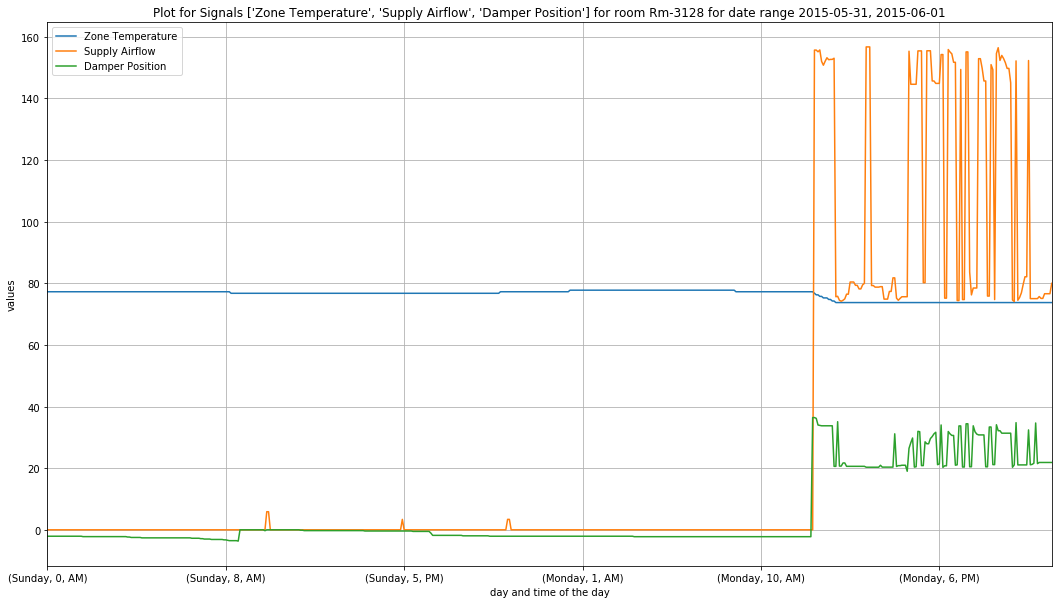

In [98]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3128"
start = "2015-05-31"
end = "2015-06-01"
plot_signal(rm,signals,start,end)

506_0_3003116.csv
506_0_3003122.csv
506_0_3003121.csv


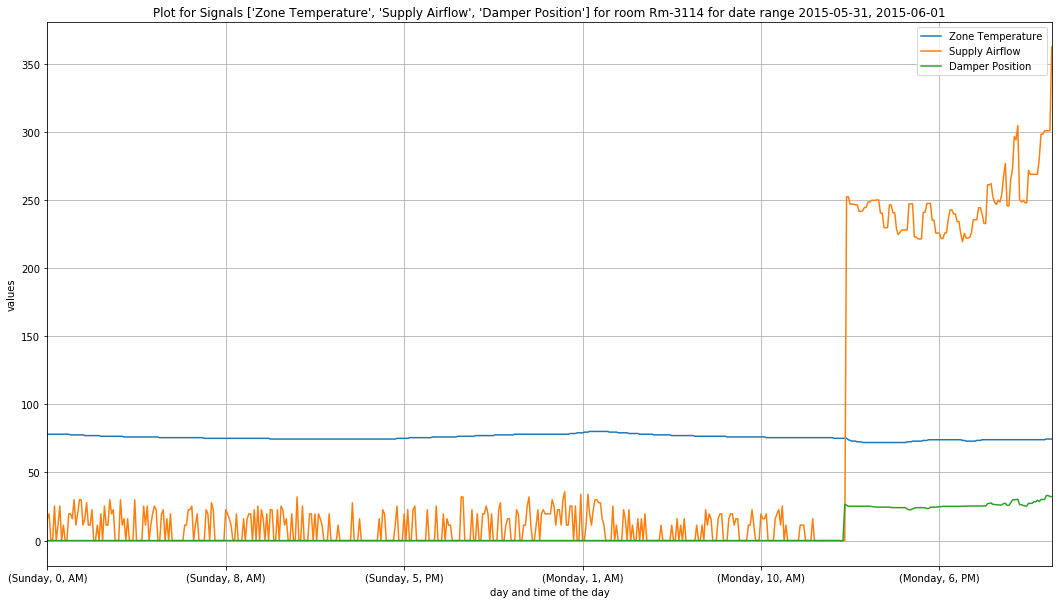

In [99]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3114"
start = "2015-05-31"
end = "2015-06-01"
plot_signal(rm,signals,start,end)

506_0_3001348.csv
506_0_3001354.csv
506_0_3001353.csv


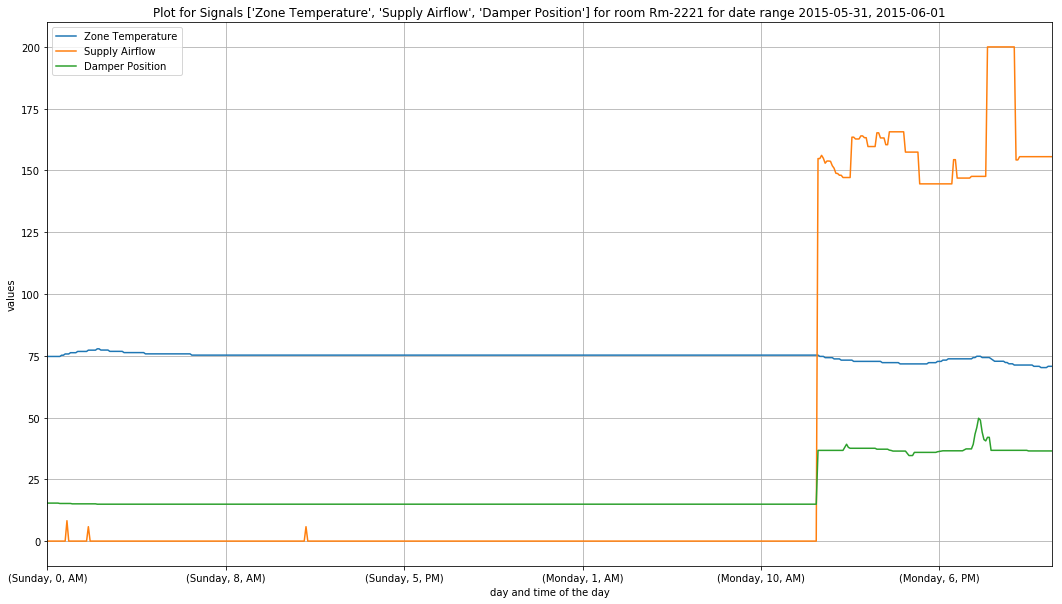

In [100]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-2221"
start = "2015-05-31"
end = "2015-06-01"
plot_signal(rm,signals,start,end)

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


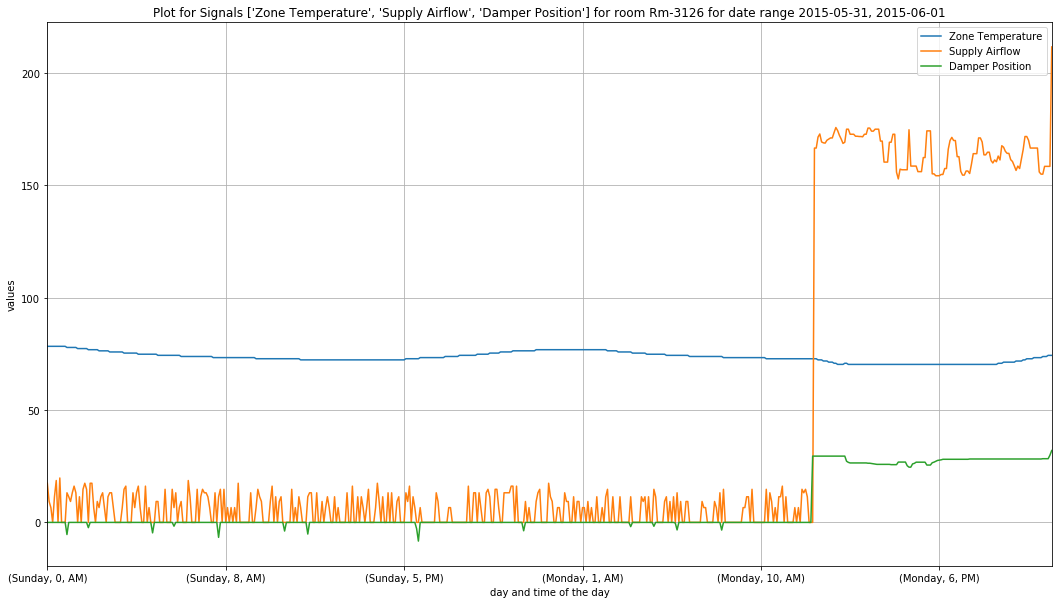

In [101]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3126"
start = "2015-05-31"
end = "2015-06-01"
plot_signal(rm,signals,start,end)

### Same Room Different Days

### Summer Weekday plot

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


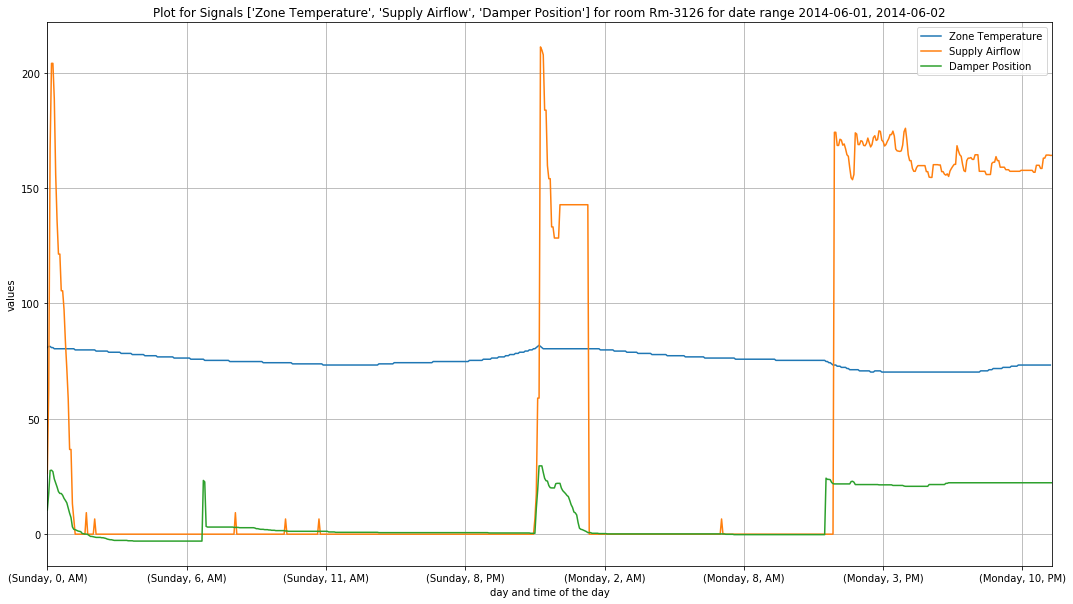

In [108]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3126"
start = "2014-06-01"
end = "2014-06-02"

plot_signal(rm,signals,start,end)

### Summer Plot for weekend

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


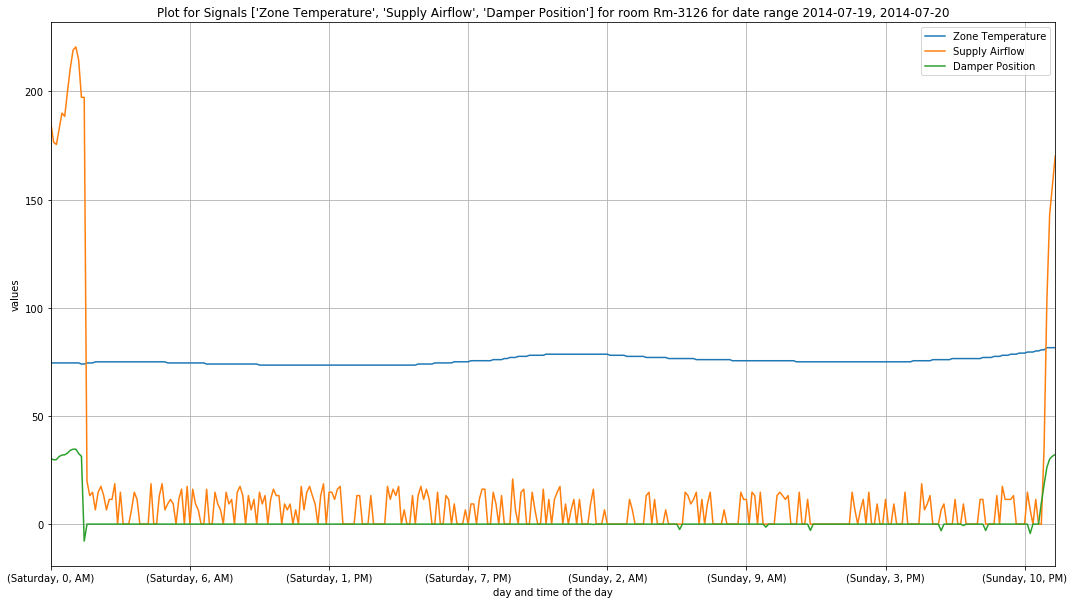

In [109]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3126"
start = "2014-07-19"
end = "2014-07-20"

plot_signal(rm,signals,start,end)


### Winter Weekday Plot

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


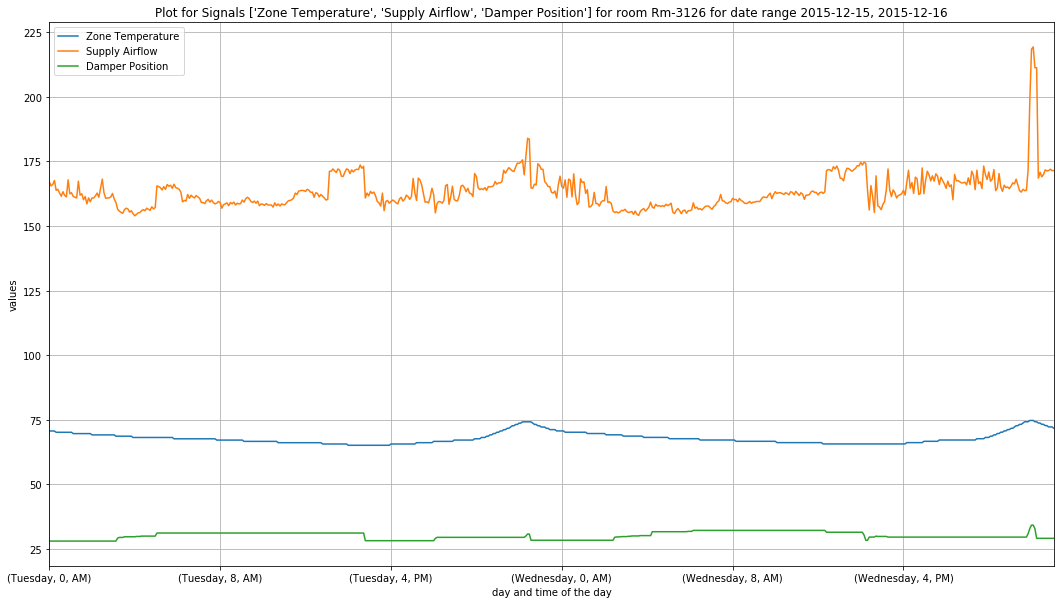

In [105]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3126"
start = "2015-12-15"
end = "2015-12-16"

plot_signal(rm,signals,start,end)


### Winter Weekend Plot

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


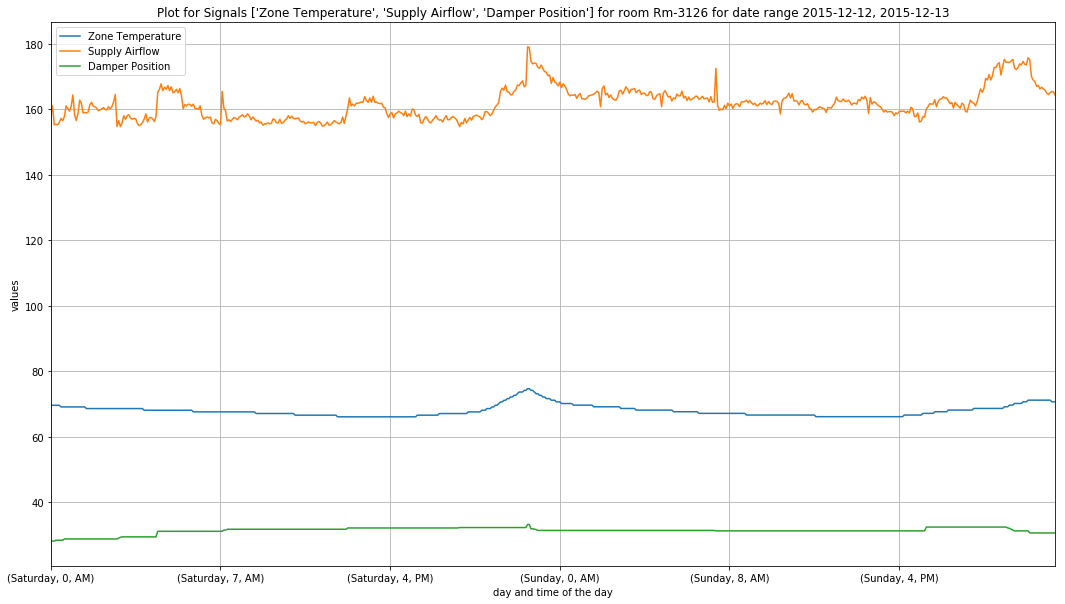

In [106]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm= "Rm-3126"
start = "2015-12-12"
end = "2015-12-13"

plot_signal(rm,signals,start,end)


### The entire Week plot for the same signals for the room Rm-3126

### Summer Entire Week Plot

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


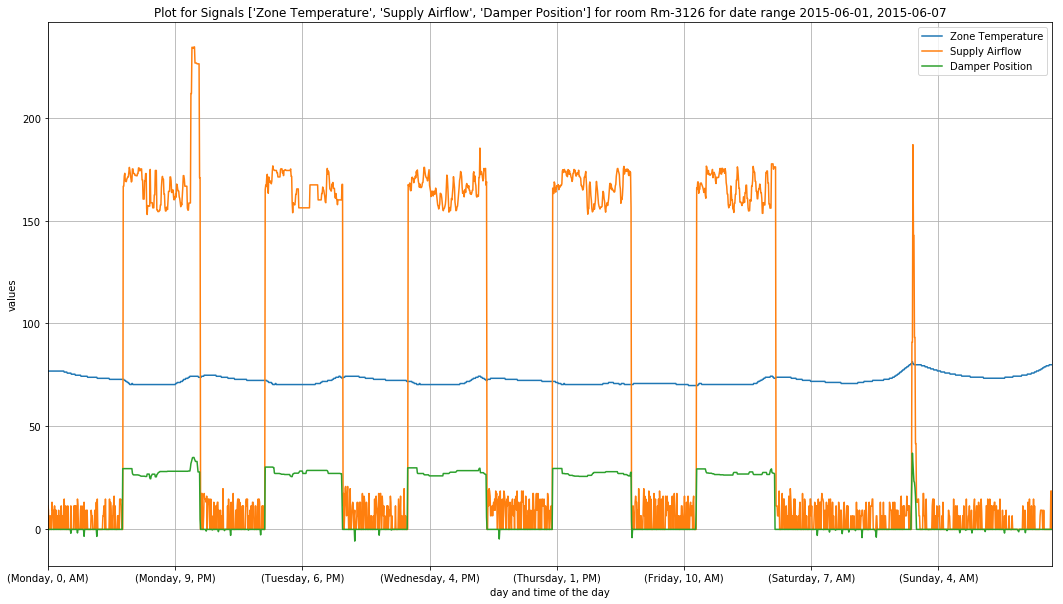

In [93]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm = "Rm-3126"
start = "2015-06-01"
end = "2015-06-07"
plot_signal(rm,signals,start,end)

### Winter Entire Week plot

506_0_3003036.csv
506_0_3003042.csv
506_0_3003041.csv


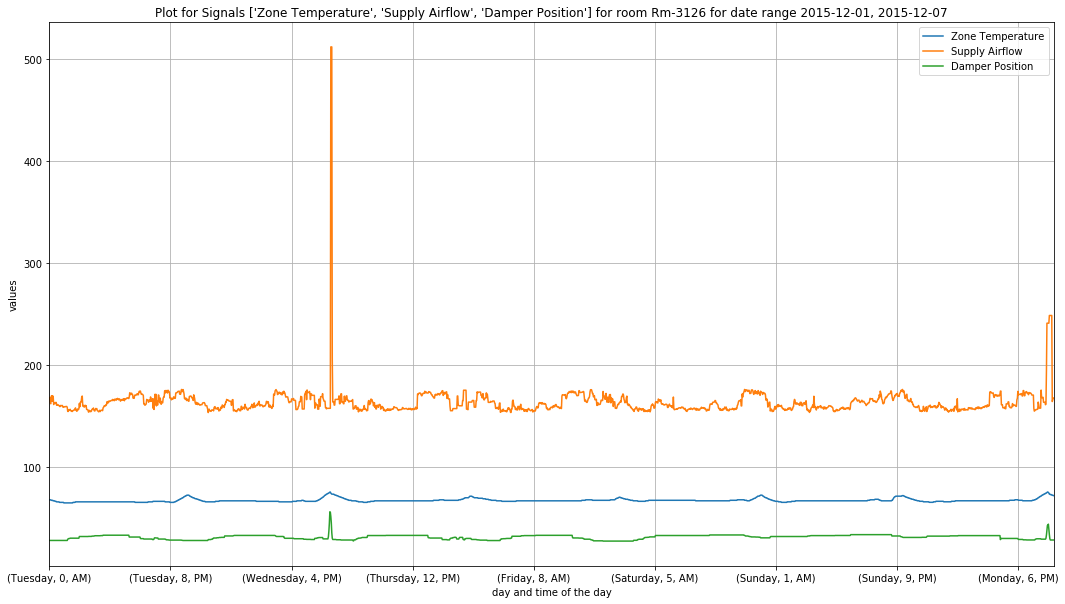

In [110]:
signals = ["Zone Temperature","Supply Airflow","Damper Position"]
rm = "Rm-3126"
start = "2015-12-01"
end = "2015-12-07"
plot_signal(rm,signals,start,end)